# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from citipy import citipy

# Import API key
from config import openWeatherKey

filepath = 'Output_Data/cities.csv'
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
 
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)
 
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [13]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + openWeatherKey

# List of city data
city_data = []

    
print('*********************************')
print('    Beginning Data Retrieval    ')
print('*********************************')
      

record_count = 0
set_count = 1
 
      
for city in cities:
      
# Group cities in sets of 50 for logging purposes
    if record_count <= 49:
        record_count += 1
    else: 
        set_count += 1
        record_count = 1
        
   
    
    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    # Log the url, record, and set numbers
    print(f'Processing Record {record_count} of Set {set_count}| {city}')
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        data = requests.get(city_url).json()
        
        # Parse out the city name, lat, lng, max temp, humidity, and cloudiness wind speed country date
        city_lat = data['coord']['lat']
        city_lon = data['coord']['lon']
        city_temp = data['main']['temp_max']
        city_humidity = data['main']['humidity']
        city_cloudiness = data['clouds']['all']
        city_windspeed = data['wind']['speed']
        city_country = data['sys']['country']
        city_date = data['dt']
        
        # Append the City information into city_data list
        city_data.append({'city' :city,
                     'lat': city_lat,
                     'lon': city_lon, 
                     'Max Temp': city_temp,
                     'Humidity' : city_humidity,
                     'Cloudiness': city_cloudiness,
                     'Windspeed' : city_windspeed,
                     'Country' : city_country,
                     'Date' : city_date})
        
    # If an error is experienced, skip the city
    except:
        print('City not found. Skipping...') 
        pass
# Indicate that Data Loading is complete 
print('*********************************')
print('   Data Retrieval Now Complete   ')
print('*********************************')

Beginning Data Retrieval
--------------------------
Processing Record 1 of Set 1| vila
Processing Record 2 of Set 1| sirjan
Processing Record 3 of Set 1| petropavlovsk-kamchatskiy
Processing Record 4 of Set 1| torbay
Processing Record 5 of Set 1| saskylakh
Processing Record 6 of Set 1| illoqqortoormiut
City not found. Skipping...
Processing Record 7 of Set 1| butaritari
Processing Record 8 of Set 1| hualmay
Processing Record 9 of Set 1| ipixuna
Processing Record 10 of Set 1| margate
Processing Record 11 of Set 1| conakry
Processing Record 12 of Set 1| port blair
Processing Record 13 of Set 1| sur
Processing Record 14 of Set 1| goderich
Processing Record 15 of Set 1| nikolskoye
Processing Record 16 of Set 1| busselton
Processing Record 17 of Set 1| kansanshi
Processing Record 18 of Set 1| adrar
Processing Record 19 of Set 1| provideniya
Processing Record 20 of Set 1| hermanus
Processing Record 21 of Set 1| bluff
Processing Record 22 of Set 1| nakamura
Processing Record 23 of Set 1| high

Processing Record 42 of Set 4| vila velha
Processing Record 43 of Set 4| lomovka
Processing Record 44 of Set 4| kavieng
Processing Record 45 of Set 4| mayor pablo lagerenza
Processing Record 46 of Set 4| poso
Processing Record 47 of Set 4| muros
Processing Record 48 of Set 4| tasiilaq
Processing Record 49 of Set 4| gasa
Processing Record 50 of Set 4| fortuna
Processing Record 1 of Set 5| honningsvag
Processing Record 2 of Set 5| yeppoon
Processing Record 3 of Set 5| aduturai
Processing Record 4 of Set 5| lorengau
Processing Record 5 of Set 5| hun
Processing Record 6 of Set 5| toktogul
Processing Record 7 of Set 5| chuy
Processing Record 8 of Set 5| kodiak
Processing Record 9 of Set 5| hirara
Processing Record 10 of Set 5| mlalo
Processing Record 11 of Set 5| dolny kubin
Processing Record 12 of Set 5| touros
Processing Record 13 of Set 5| ostrovnoy
Processing Record 14 of Set 5| eureka
Processing Record 15 of Set 5| kuche
City not found. Skipping...
Processing Record 16 of Set 5| pucall

Processing Record 39 of Set 8| urumqi
Processing Record 40 of Set 8| komsomolskiy
Processing Record 41 of Set 8| dawei
Processing Record 42 of Set 8| kushiro
Processing Record 43 of Set 8| samarai
Processing Record 44 of Set 8| bay roberts
Processing Record 45 of Set 8| severodvinsk
Processing Record 46 of Set 8| narsaq
Processing Record 47 of Set 8| cabo frio
Processing Record 48 of Set 8| ahipara
Processing Record 49 of Set 8| jinka
Processing Record 50 of Set 8| bolungarvik
City not found. Skipping...
Processing Record 1 of Set 9| bela
Processing Record 2 of Set 9| radhanpur
Processing Record 3 of Set 9| namtsy
Processing Record 4 of Set 9| ambulu
Processing Record 5 of Set 9| zhangye
Processing Record 6 of Set 9| evensk
Processing Record 7 of Set 9| geresk
City not found. Skipping...
Processing Record 8 of Set 9| sinnamary
Processing Record 9 of Set 9| tura
Processing Record 10 of Set 9| portree
Processing Record 11 of Set 9| ambovombe
Processing Record 12 of Set 9| faya
Processing

Processing Record 34 of Set 12| the valley
Processing Record 35 of Set 12| batticaloa
Processing Record 36 of Set 12| goedereede
Processing Record 37 of Set 12| nanakuli
Processing Record 38 of Set 12| bidor
Processing Record 39 of Set 12| kloulklubed
Processing Record 40 of Set 12| waddan
Processing Record 41 of Set 12| ondangwa
Processing Record 42 of Set 12| angoram
Processing Record 43 of Set 12| cap malheureux
Processing Record 44 of Set 12| grand centre
City not found. Skipping...
Processing Record 45 of Set 12| sibolga
Processing Record 46 of Set 12| hasaki
Processing Record 47 of Set 12| saint-joseph
Processing Record 48 of Set 12| ilulissat
Processing Record 49 of Set 12| lazaro cardenas
Processing Record 50 of Set 12| wanning
Processing Record 1 of Set 13| pedasi
Processing Record 2 of Set 13| baykit
Processing Record 3 of Set 13| tyazhinskiy
Processing Record 4 of Set 13| tomatlan
Processing Record 5 of Set 13| stykkisholmur
Processing Record 6 of Set 13| hailar
Processing R

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [105]:
city_data_df = pd.DataFrame(city_data)
city_data_df.count()

city          567
lat           567
lon           567
Max Temp      567
Humidity      567
Cloudiness    567
Windspeed     567
Country       567
Date          567
dtype: int64

In [106]:
city_data_df.head()

,city,lat,lon,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,vila,42.0304,-8.1588,66.20,34,0,17.27,PT,1613409437
1,sirjan,29.4520,55.6814,54.18,32,0,2.37,IR,1613409437
2,petropavlovsk-kamchatskiy,53.0452,158.6483,5.00,72,0,8.95,RU,1613409438
3,torbay,47.6666,-52.7314,28.99,64,75,21.85,CA,1613409438
4,saskylakh,71.9167,114.0833,-22.52,86,100,9.64,RU,1613409438


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [107]:
city_data_df.describe()

,lat,lon,Max Temp,Humidity,Cloudiness,Windspeed,Date
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,5.670000e+02
mean,21.057759,17.351469,49.124991,72.151675,54.439153,8.042540,1.613409e+09
std,32.972618,89.718973,33.659614,19.849743,38.573587,5.653298,6.185024e+01
min,-54.800000,-175.200000,-33.650000,7.000000,0.000000,0.270000,1.613409e+09
25%,-4.741700,-61.757200,25.000000,62.000000,19.000000,3.600000,1.613409e+09
50%,26.184200,22.788200,60.100000,77.000000,70.000000,6.730000,1.613409e+09
75%,50.024850,98.647900,77.430000,87.000000,90.000000,10.975000,1.613410e+09
max,78.218600,179.316700,104.130000,100.000000,100.000000,33.760000,1.613410e+09


In [108]:
humid_cities = city_data_df.loc[city_data_df['Humidity'] > 100]
humid_cities

,city,lat,lon,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date


In [109]:
#  No cities that have humidity over 100%.


In [110]:
city_data_df.to_csv('city_weather.csv', header = True, index = False)

In [111]:
lats = city_data_df['lat']
max_temp = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
windspeed = city_data_df['Windspeed']

city_df = pd.DataFrame({'Latitude': lats,
                     'Max_Temp' : max_temp, 
                     'Humidity' : humidity,
                     'Cloudiness': cloudiness,
                     'Windspeed' : windspeed}) 
city_df

,Latitude,Max_Temp,Humidity,Cloudiness,Windspeed
0,42.0304,66.20,34,0,17.27
1,29.4520,54.18,32,0,2.37
2,53.0452,5.00,72,0,8.95
3,47.6666,28.99,64,75,21.85
4,71.9167,-22.52,86,100,9.64
...,...,...,...,...,...
562,65.0757,39.31,86,94,15.99
563,49.2000,-20.38,87,40,5.95
564,49.6000,-17.95,82,25,7.34
565,48.8264,16.92,96,100,6.98


In [112]:
lat = city_df['Latitude']
temp = city_df['Max_Temp']
hum = city_df['Humidity']
cloud = city_df['Cloudiness']
wind = city_df['Windspeed']

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

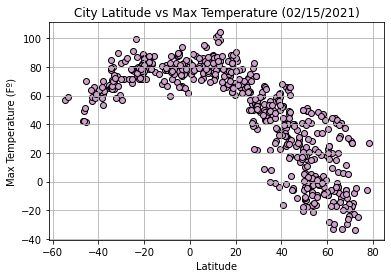

In [113]:
plt.scatter(lat, temp, marker='o', facecolors='#cfa1cc', edgecolors='black')

plt.title('City Latitude vs Max Temperature (02/15/2021)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (Fº)')
plt.grid(True)


plt.savefig('../06-API-Challenge/Output_Data/lat_v_temp.png')
plt.show()

## Latitude vs. Humidity Plot

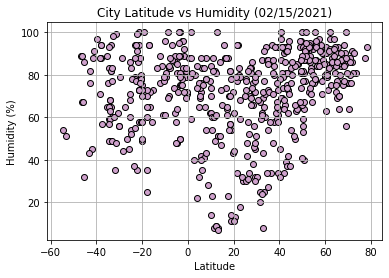

In [114]:
plt.scatter(lat, hum, marker='o', facecolors='#cfa1cc', edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs Humidity (02/15/2021)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig('../06-API-Challenge/Output_Data/lat_v_hum.png')
plt.show()

## Latitude vs. Cloudiness Plot

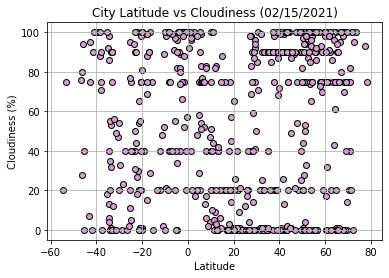

In [115]:
plt.scatter(lat, cloud, marker='o', facecolors='#cfa1cc', edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs Cloudiness (02/15/2021)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig('../06-API-Challenge/Output_Data/lat_v_cloud.png')
plt.show()

## Latitude vs. Wind Speed Plot

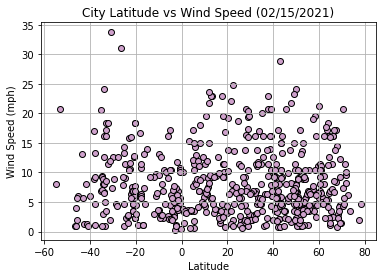

In [116]:
plt.scatter(lat, wind, marker='o', facecolors='#cfa1cc', edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs Wind Speed (02/15/2021)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)

# Save the figure
plt.savefig('../06-API-Challenge/Output_Data/lat_v_wind.png')
plt.show()

## Linear Regression

In [117]:
north = city_df.loc[city_df['Latitude'] > 0]
north.head()

,Latitude,Max_Temp,Humidity,Cloudiness,Windspeed
0,42.0304,66.20,34,0,17.27
1,29.4520,54.18,32,0,2.37
2,53.0452,5.00,72,0,8.95
3,47.6666,28.99,64,75,21.85
4,71.9167,-22.52,86,100,9.64


In [119]:
south = city_df.loc[city_df['Latitude'] < 0]
south.head()

,Latitude,Max_Temp,Humidity,Cloudiness,Windspeed
6,-11.0964,77.79,61,2,9.80
7,-1.7625,78.80,89,75,6.91
14,-33.6500,66.99,94,1,1.01
15,-12.0951,68.18,76,20,2.91
18,-34.4187,66.99,59,6,3.00


In [185]:
def lin_regress(x_values, y_values, x_label, y_label):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    
    plt.scatter(x_values, y_values,)
    plt.plot(x_values,regress_values,'r-')
    
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.title(title)
    plt.show()
     
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="black")  
    
    print(f'The r-value is: {round(rvalue,4)} & the equation is: {line_eq}')

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

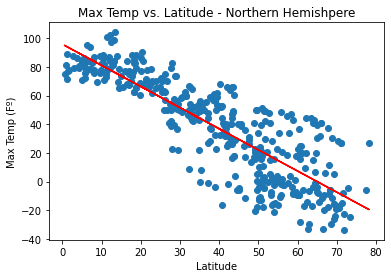

The r-value is: -0.8497 & the equation is: y = -1.47x + 95.76


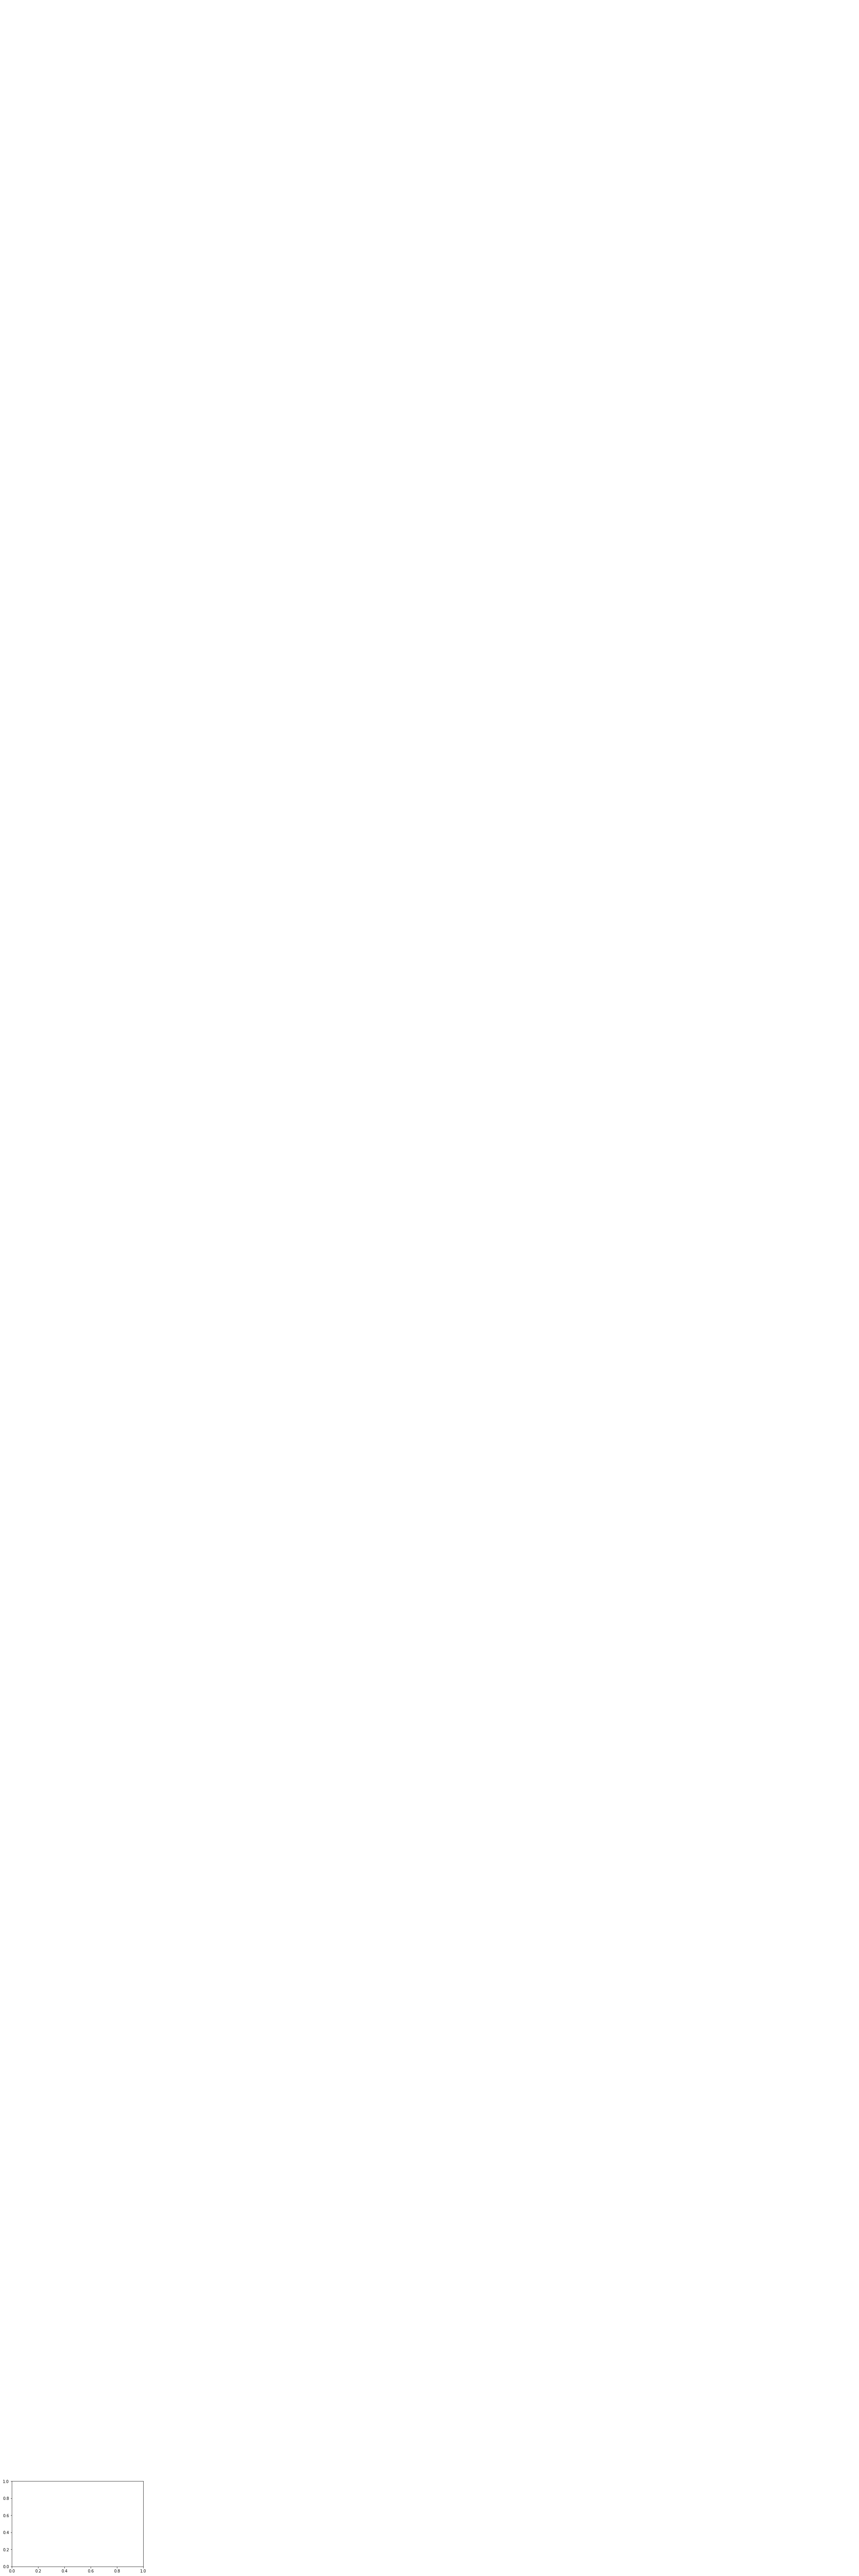

In [188]:
x_values = north['Latitude']
y_values = north['Max_Temp']
y_label = 'Max Temp (Fº)'
x_label = 'Latitude'
title = 'Max Temp vs. Latitude - Northern Hemishpere'

lin_regress(x_values, y_values, x_label, y_label,)


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

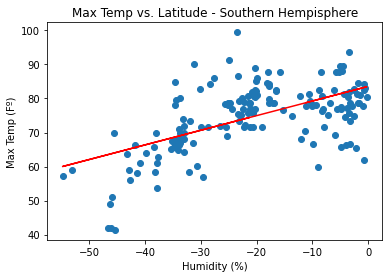

The r-value is: 0.5842 & the equation is: y = 0.43x + 83.55


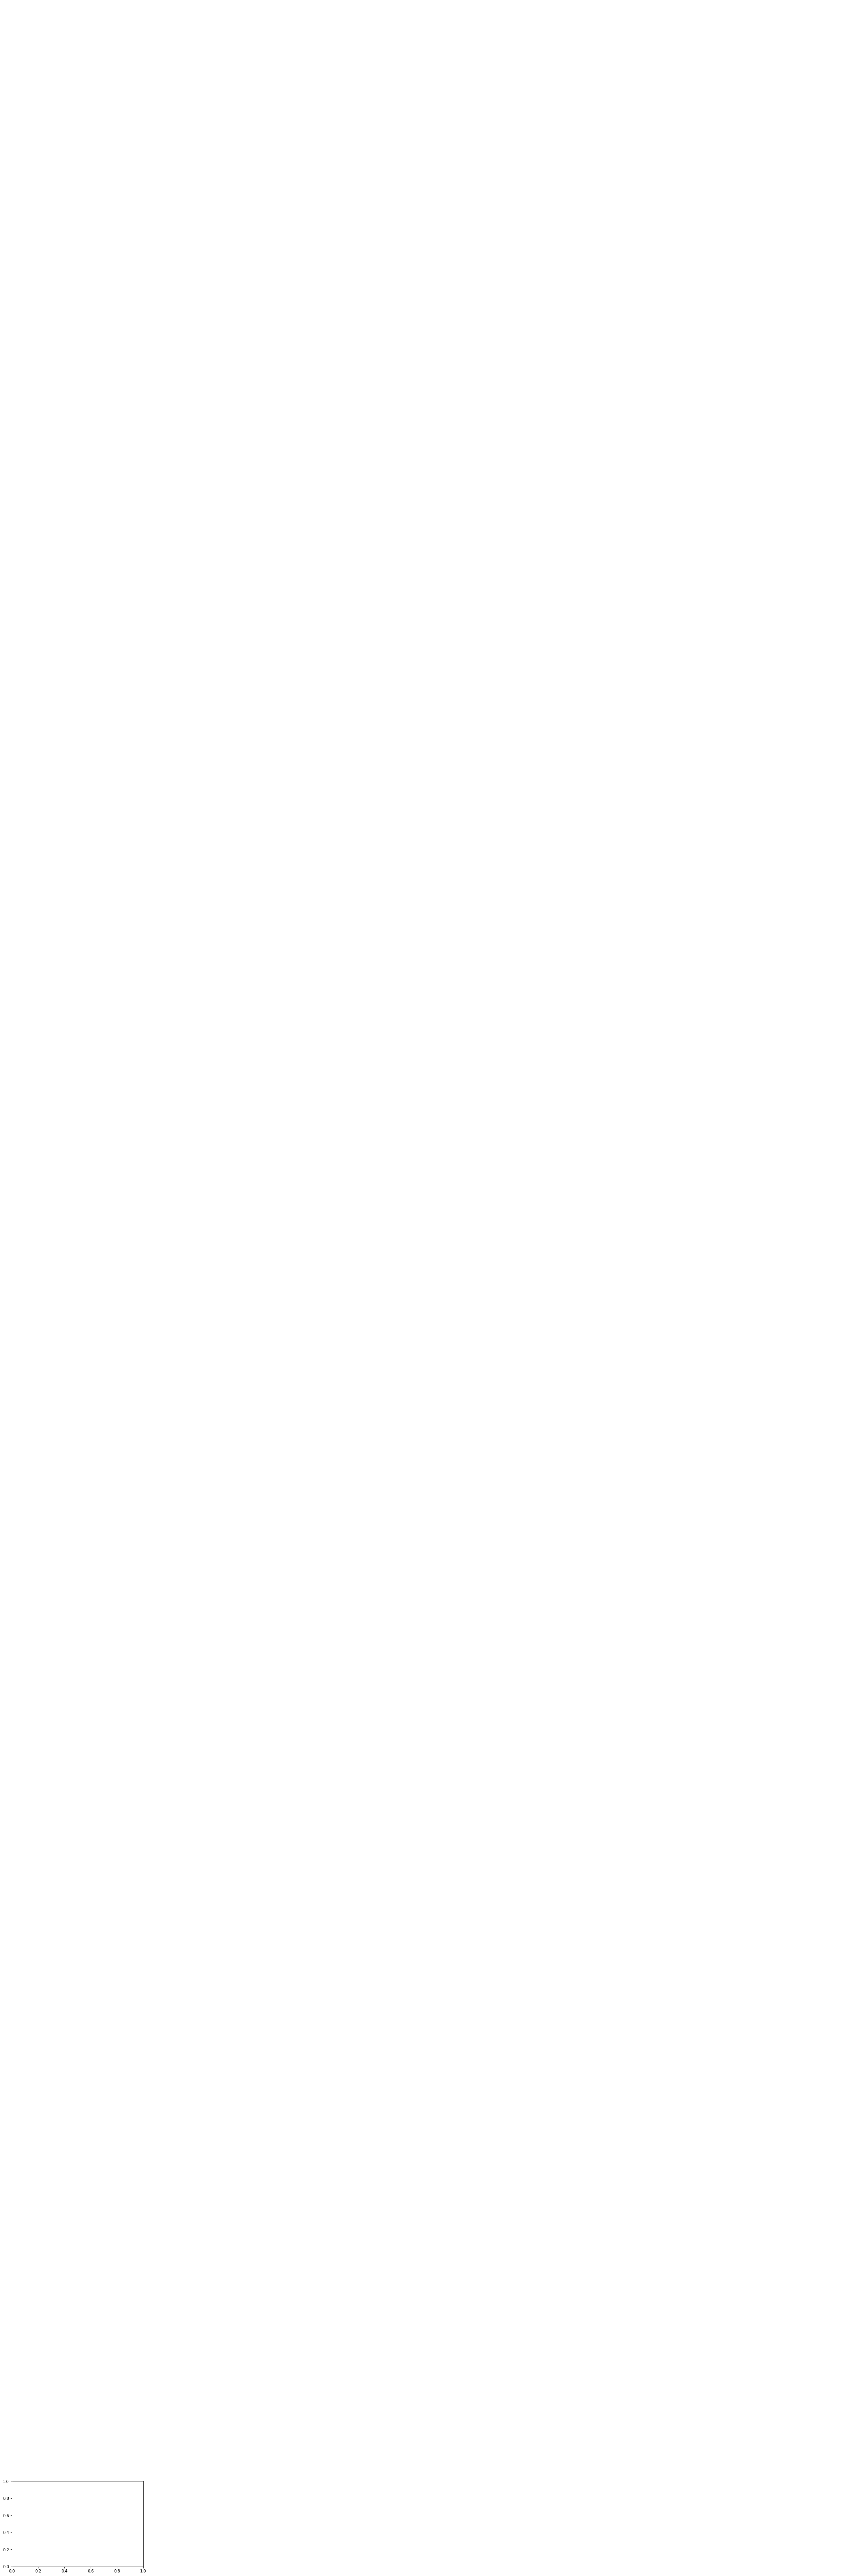

In [192]:
x_values = south['Latitude']
y_values = south['Max_Temp']
y_label = 'Max Temp (Fº)'
x_label = 'Humidity (%)'
title = 'Max Temp vs. Latitude - Southern Hempisphere'

lin_regress(x_values, y_values, x_label, y_label,)


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

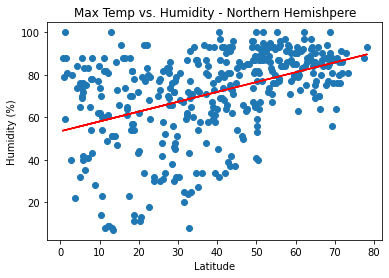

The r-value is: 0.4344 & the equation is: y = 0.46x + 53.41


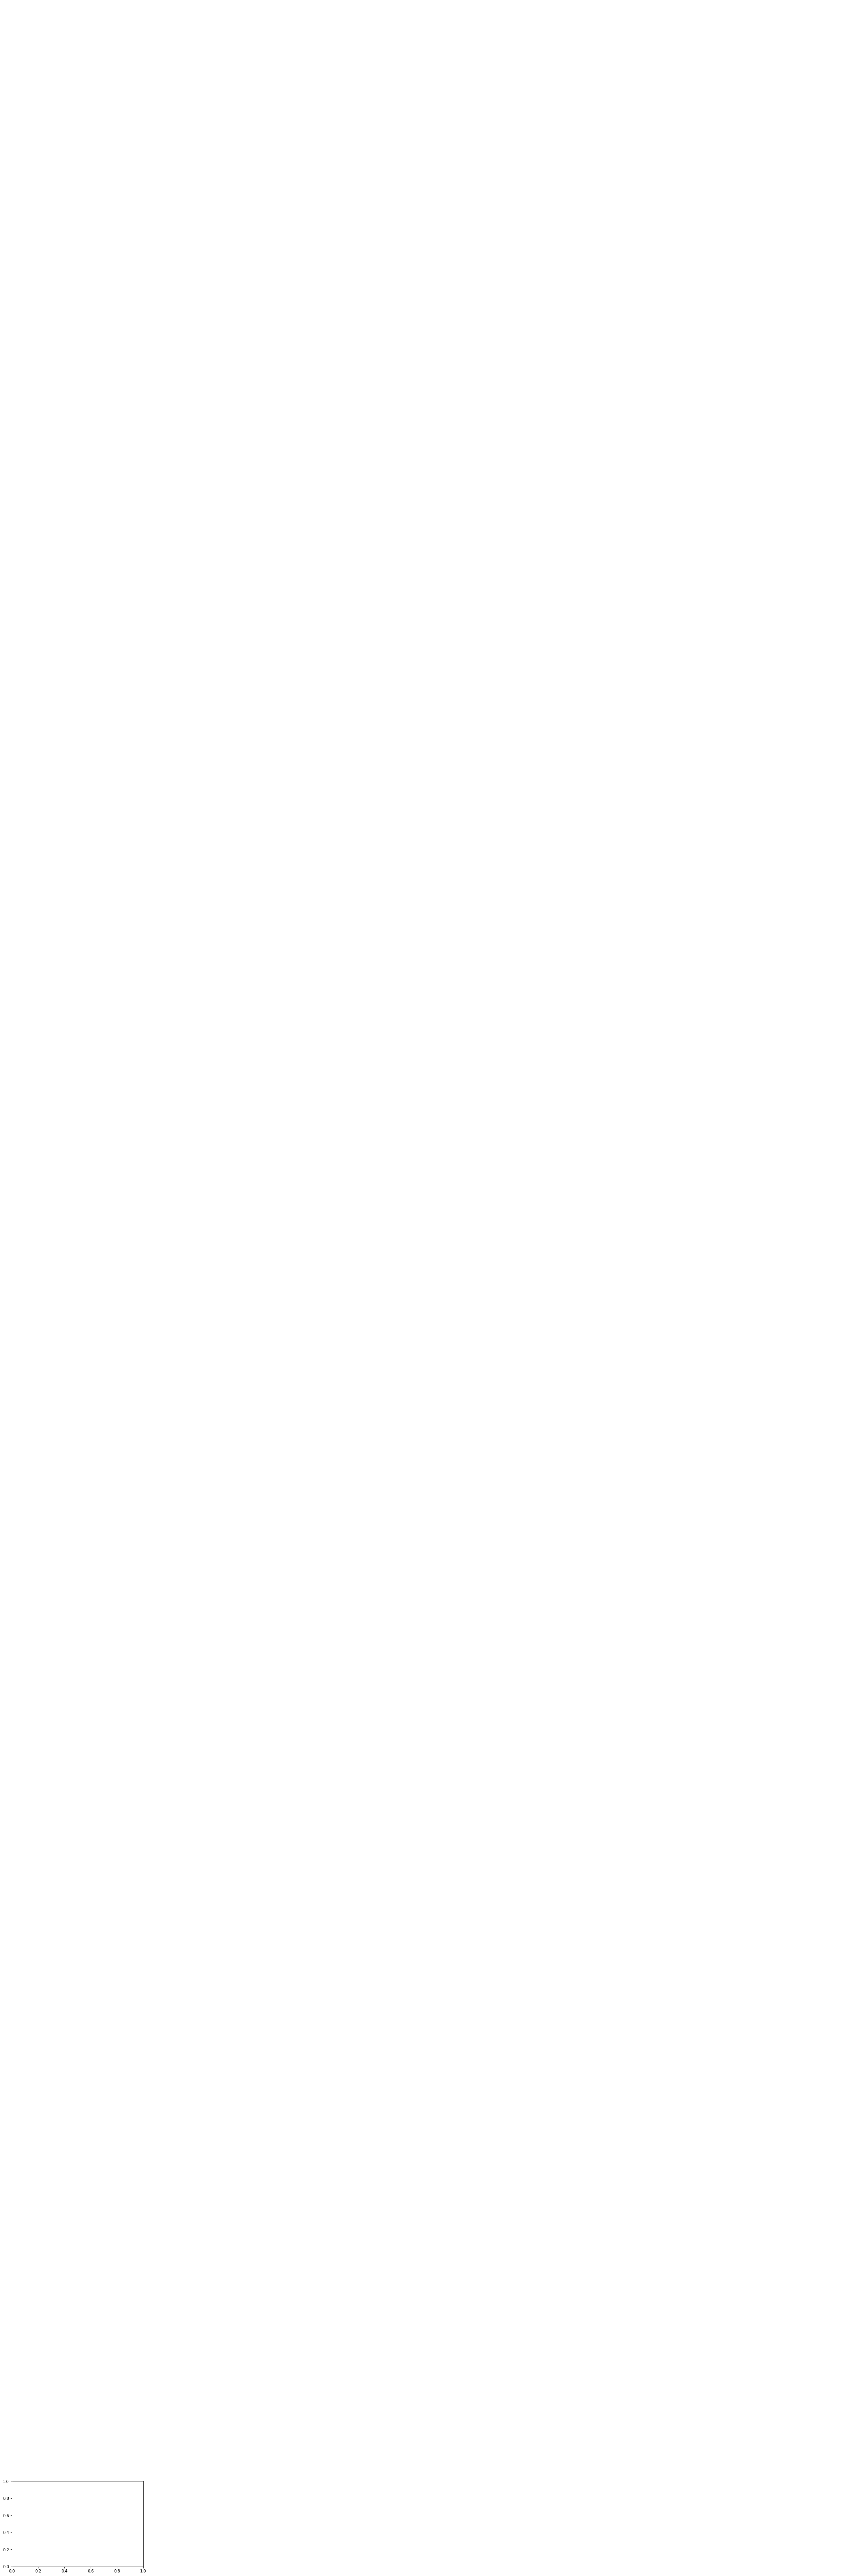

In [194]:
x_values = north['Latitude'] 
y_values = north['Humidity']
x_label = 'Latitude'
y_label = 'Humidity (%)'
title = 'Humidity(%) vs. Latitude - Northern Hemishpere'

lin_regress(x_values, y_values, x_label, y_label,)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

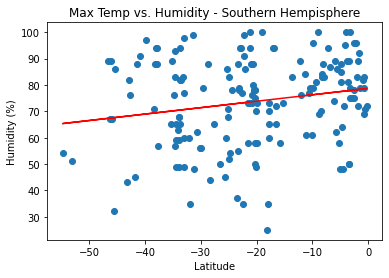

The r-value is: 0.1979 & the equation is: y = 0.24x + 78.7


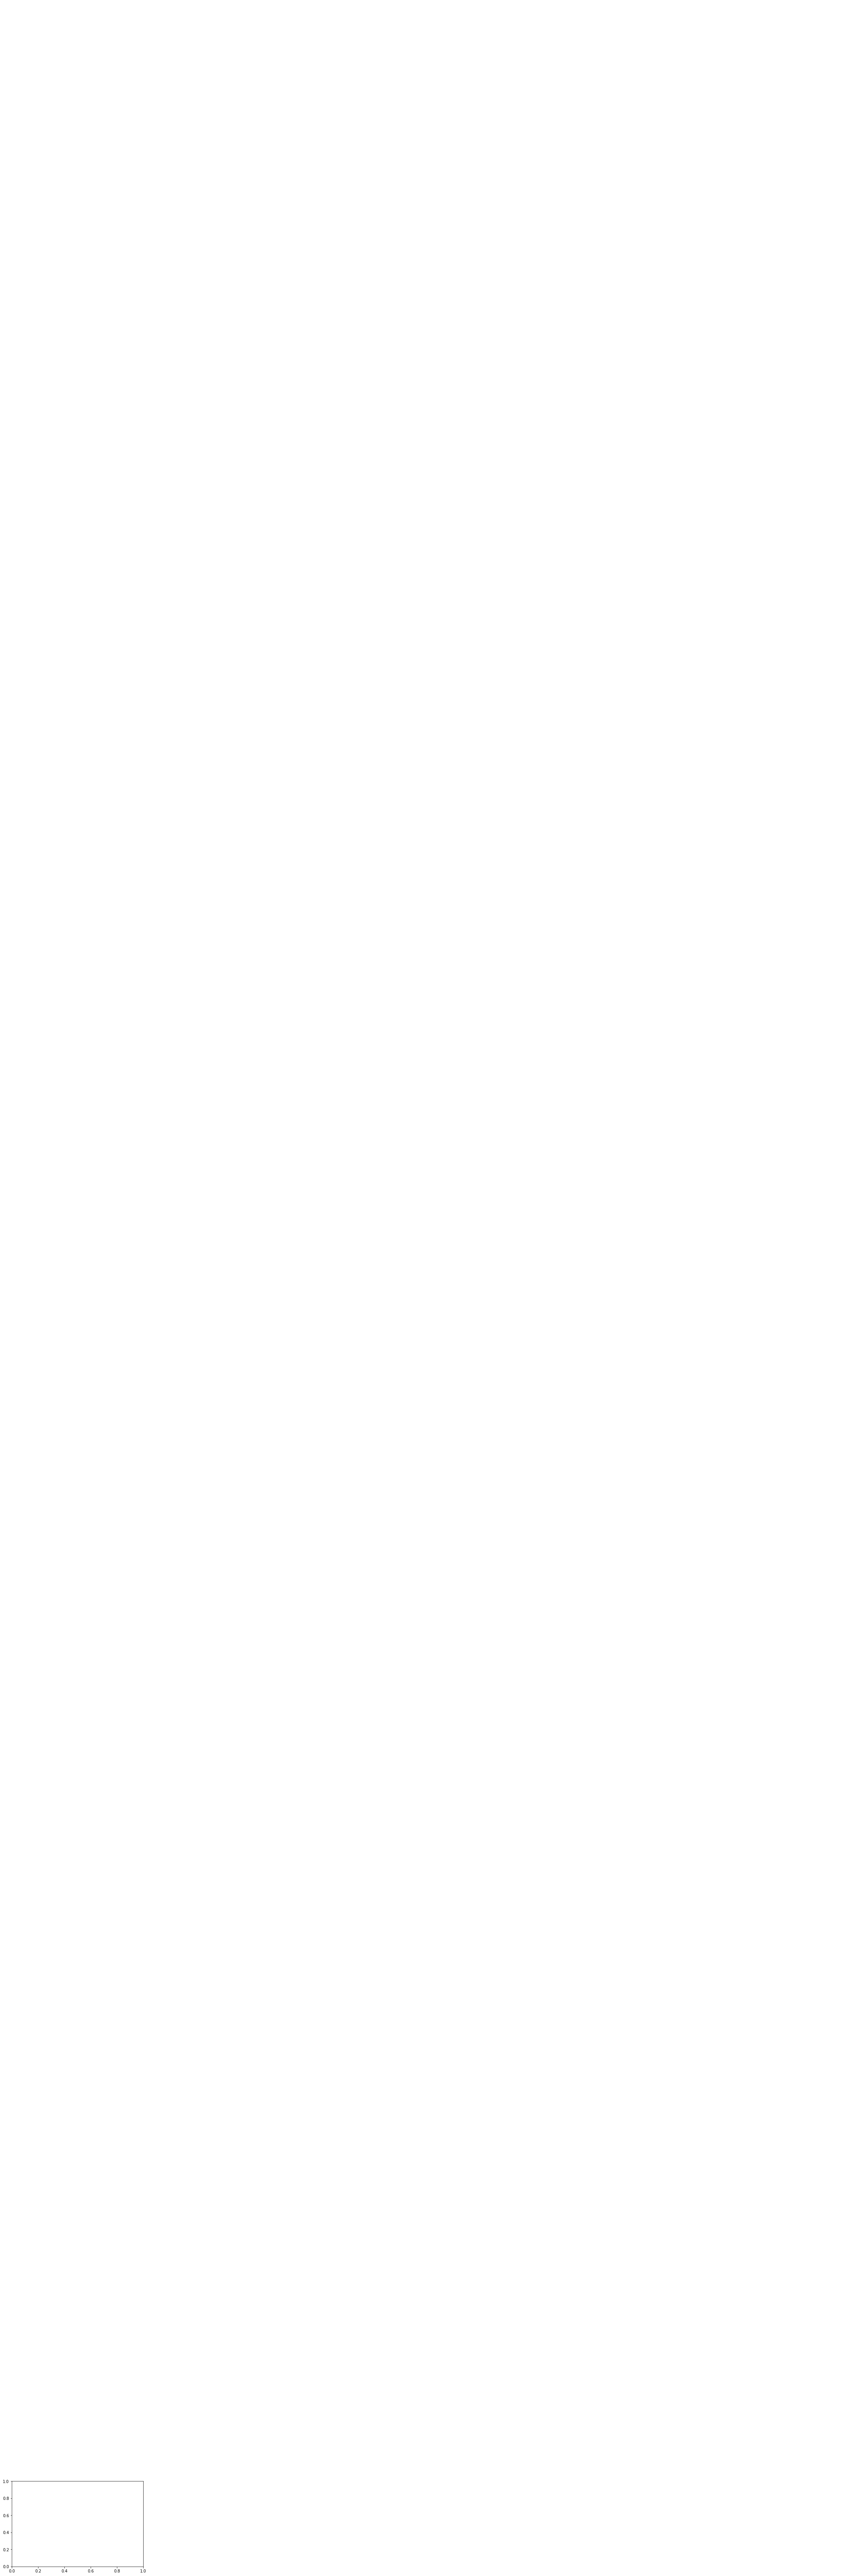

In [195]:
x_values = south['Latitude'] 
y_values = south['Humidity']
x_label = 'Latitude'
y_label = 'Humidity (%)'
title = 'Max Temp vs. Humidity - Southern Hempisphere'

lin_regress(x_values, y_values, x_label, y_label,)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

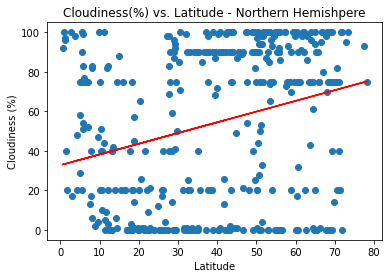

The r-value is: 0.2717 & the equation is: y = 0.54x + 32.77


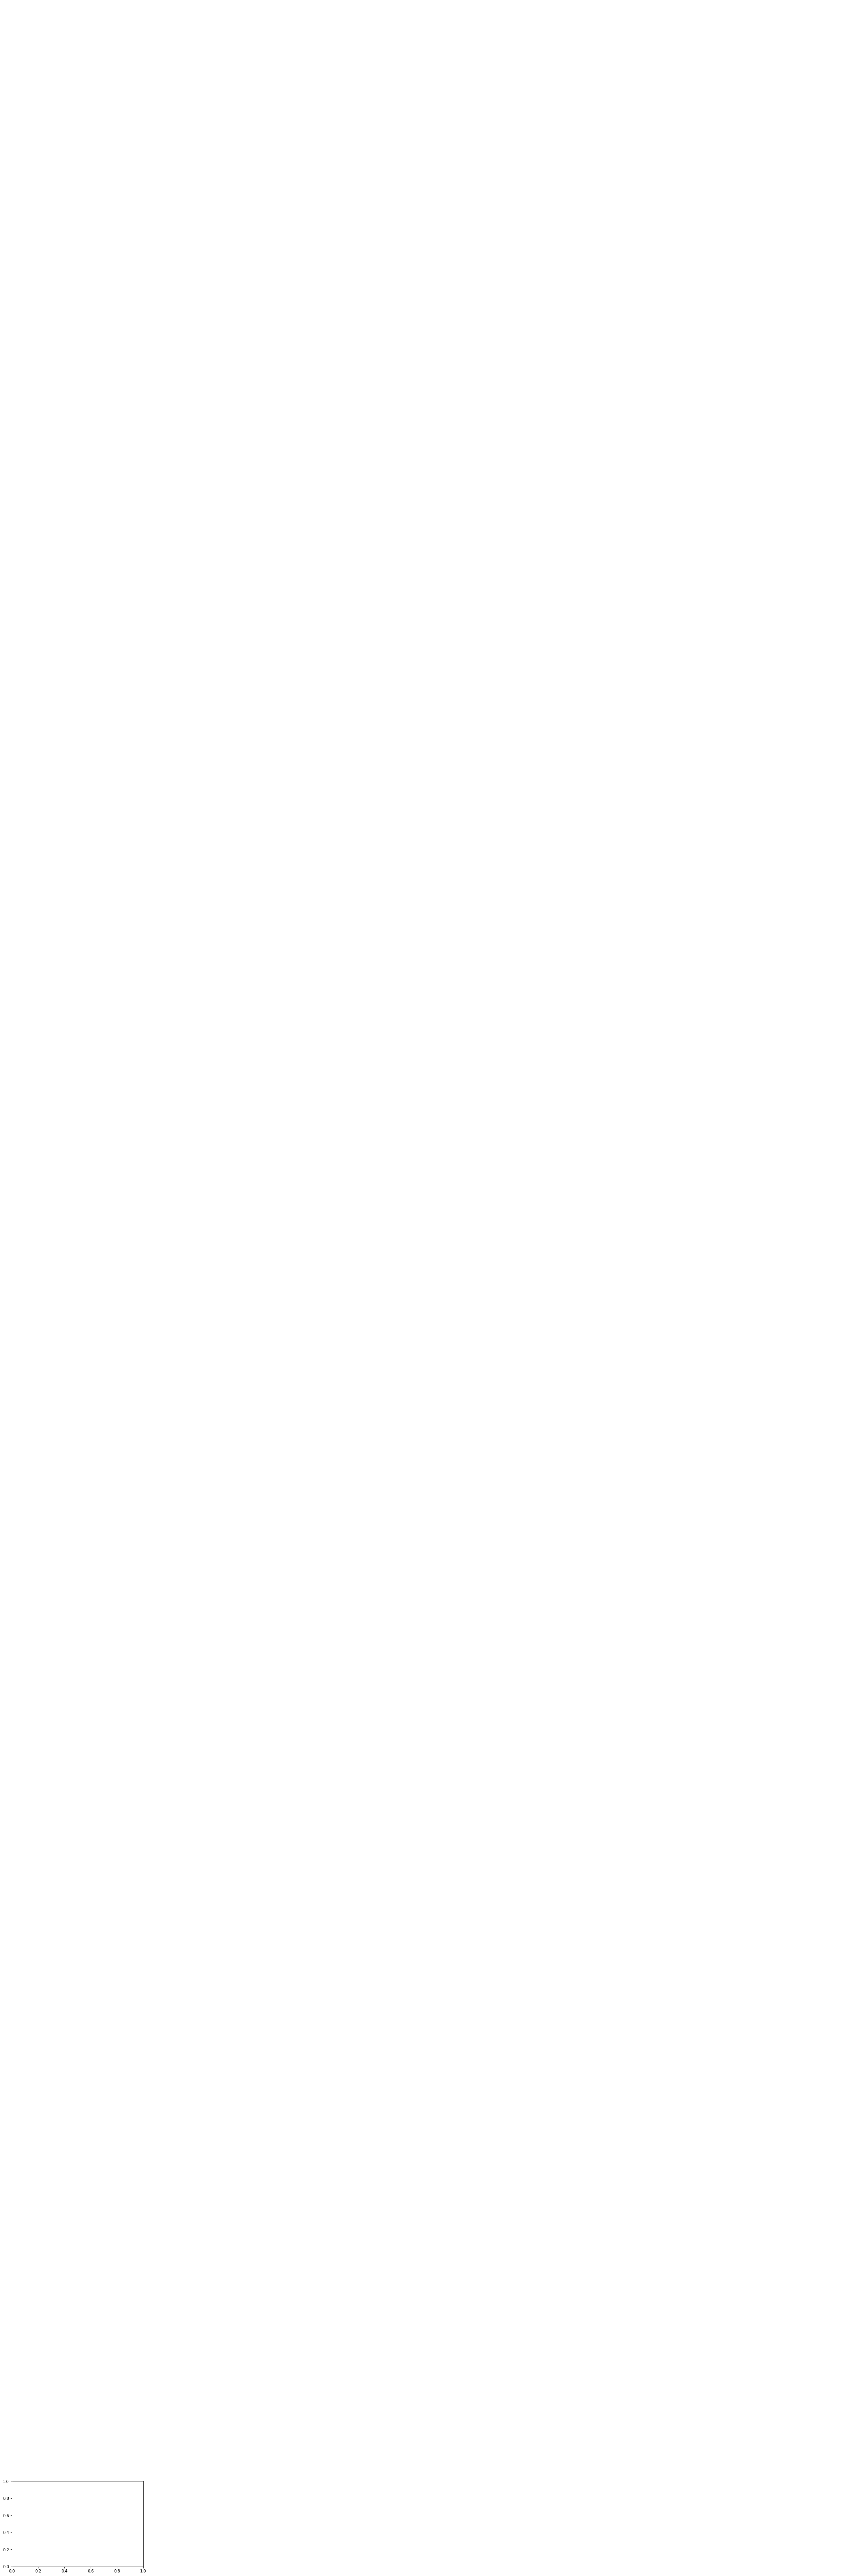

In [196]:
x_values = north['Latitude'] 
y_values = north['Cloudiness']
x_label = 'Latitude'
y_label = 'Cloudiness (%)'
title = 'Cloudiness(%) vs. Latitude - Northern Hemishpere'

lin_regress(x_values, y_values, x_label, y_label,)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

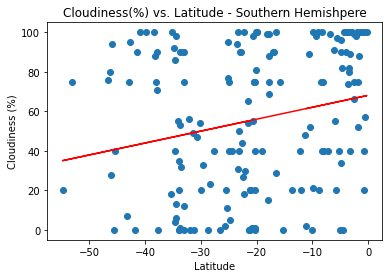

The r-value is: 0.2227 & the equation is: y = 0.6x + 68.08


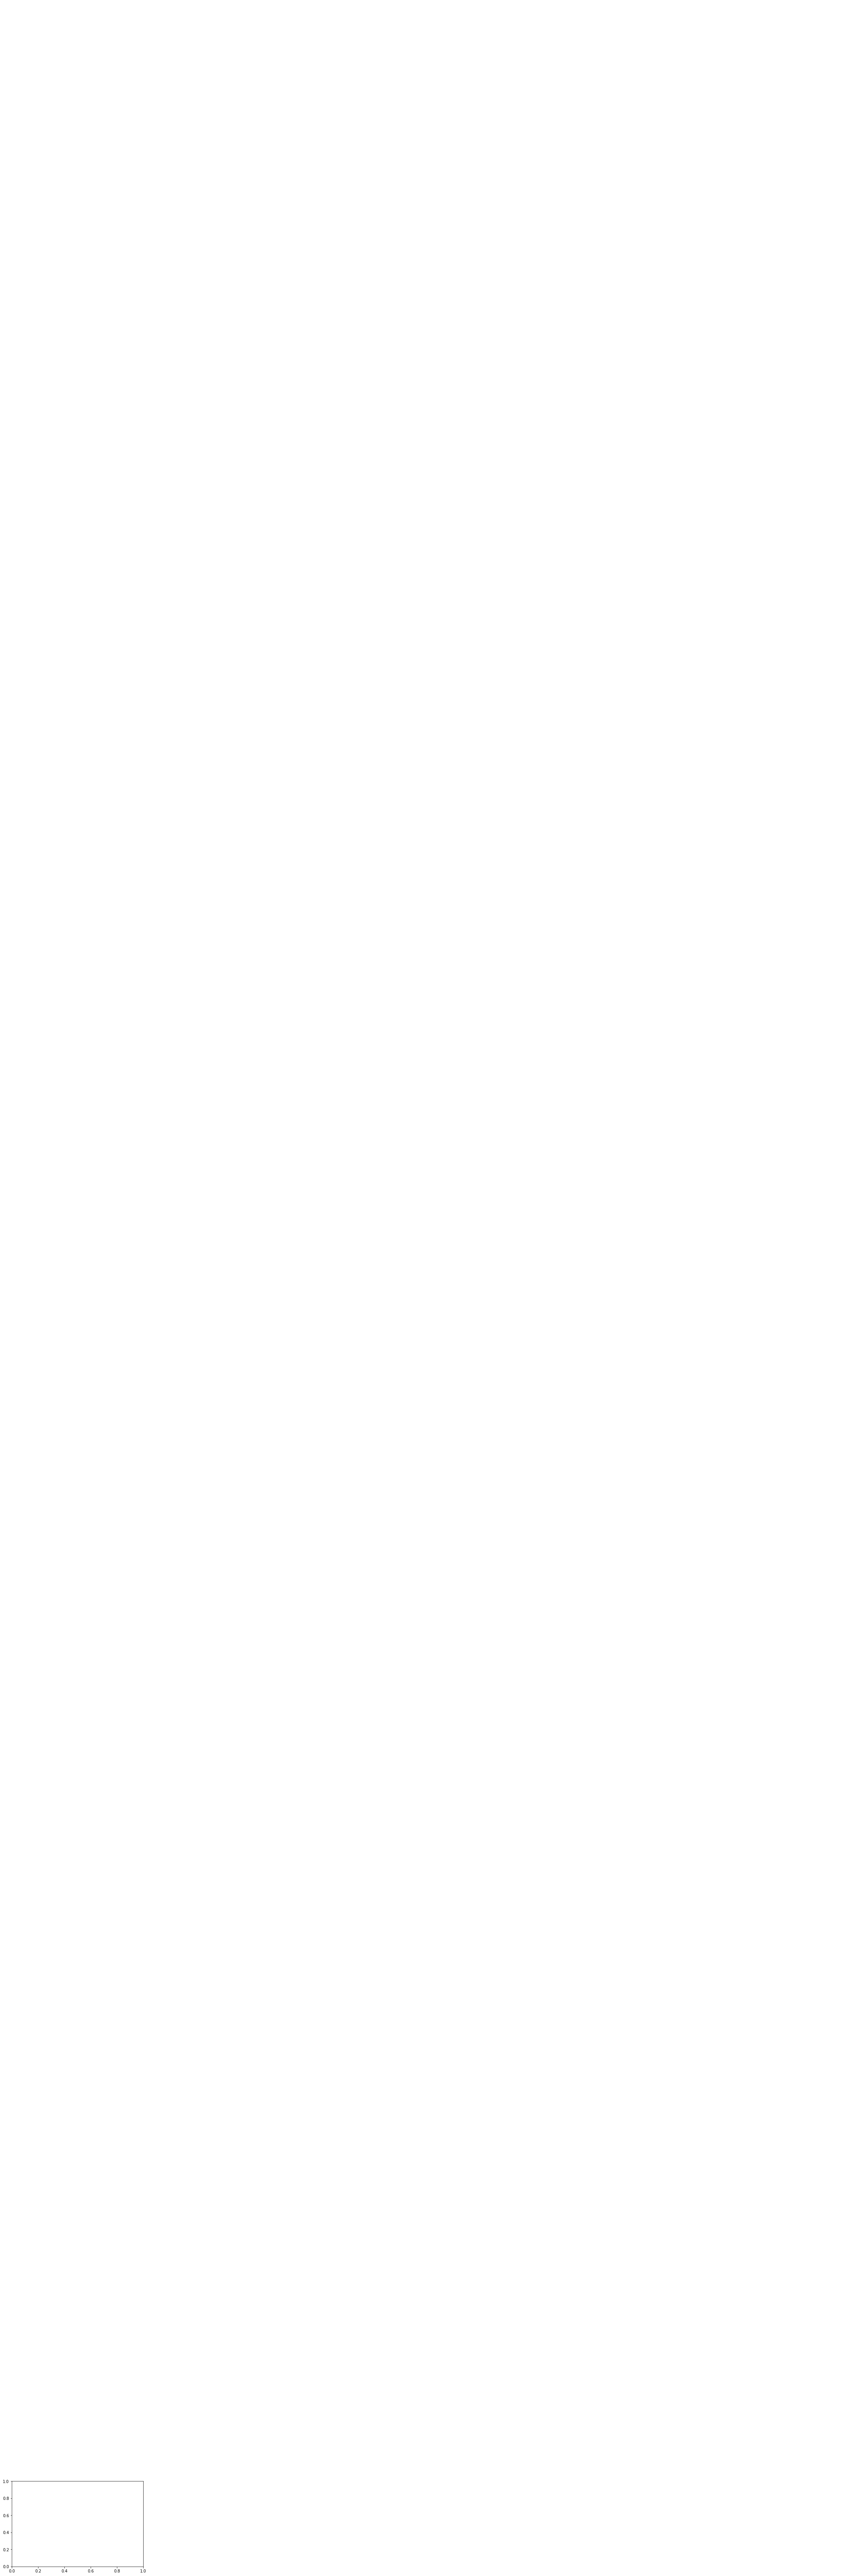

In [197]:
x_values = south['Latitude'] 
y_values = south['Cloudiness']
x_label = 'Latitude'
y_label = 'Cloudiness (%)'
title = 'Cloudiness(%) vs. Latitude - Southern Hemishpere'

lin_regress(x_values, y_values, x_label, y_label,)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

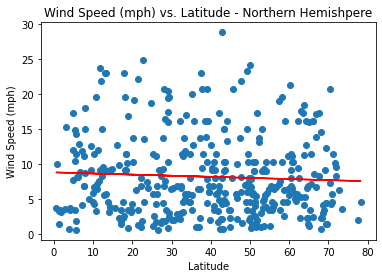

The r-value is: -0.0553 & the equation is: y = -0.02x + 8.81


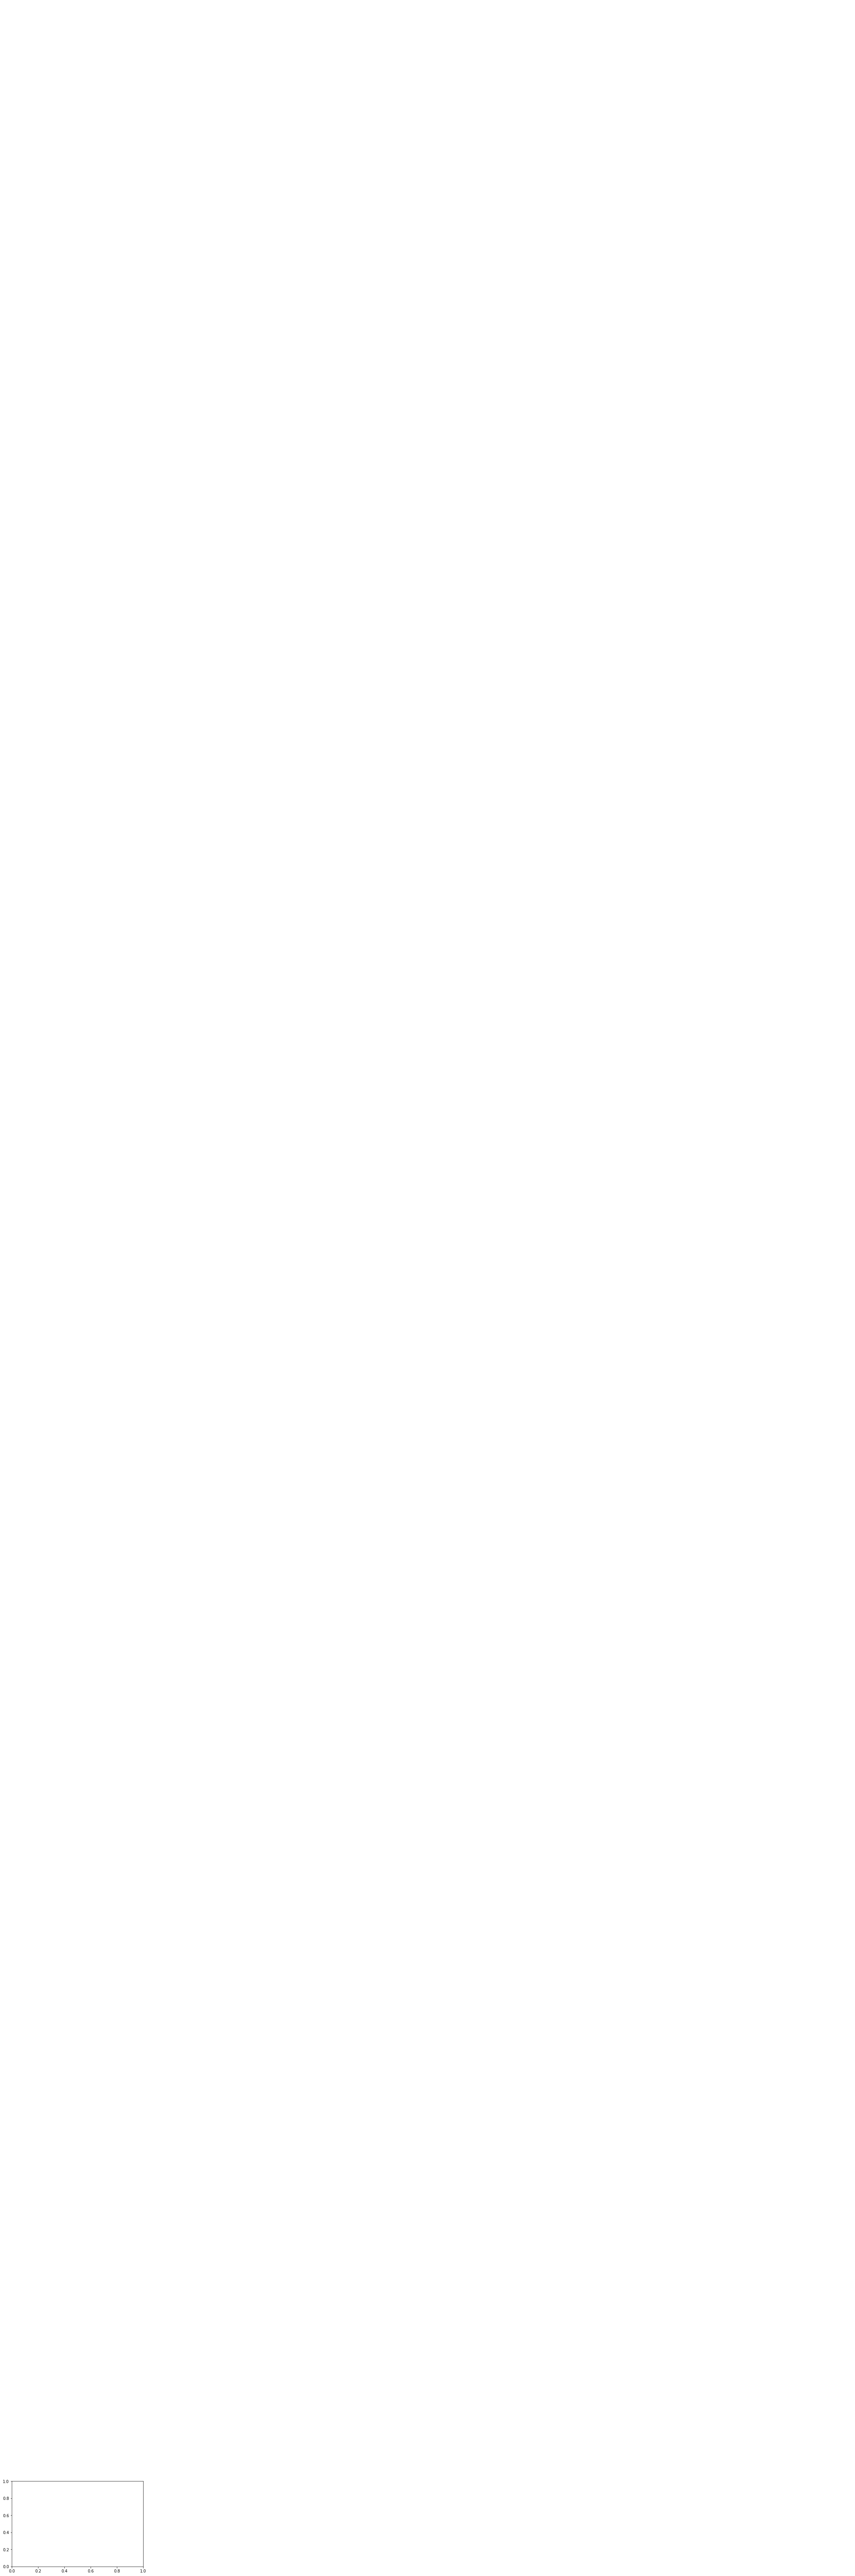

In [198]:
x_values = north['Latitude'] 
y_values = north['Windspeed']
x_label = 'Latitude'
y_label = 'Wind Speed (mph)'
title = 'Wind Speed (mph) vs. Latitude - Northern Hemishpere'

lin_regress(x_values, y_values, x_label, y_label,)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

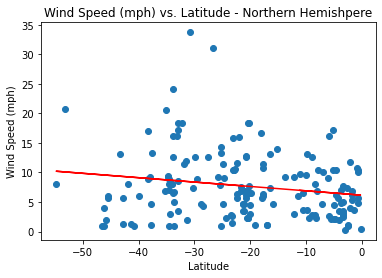

The r-value is: -0.1775 & the equation is: y = -0.07x + 6.15


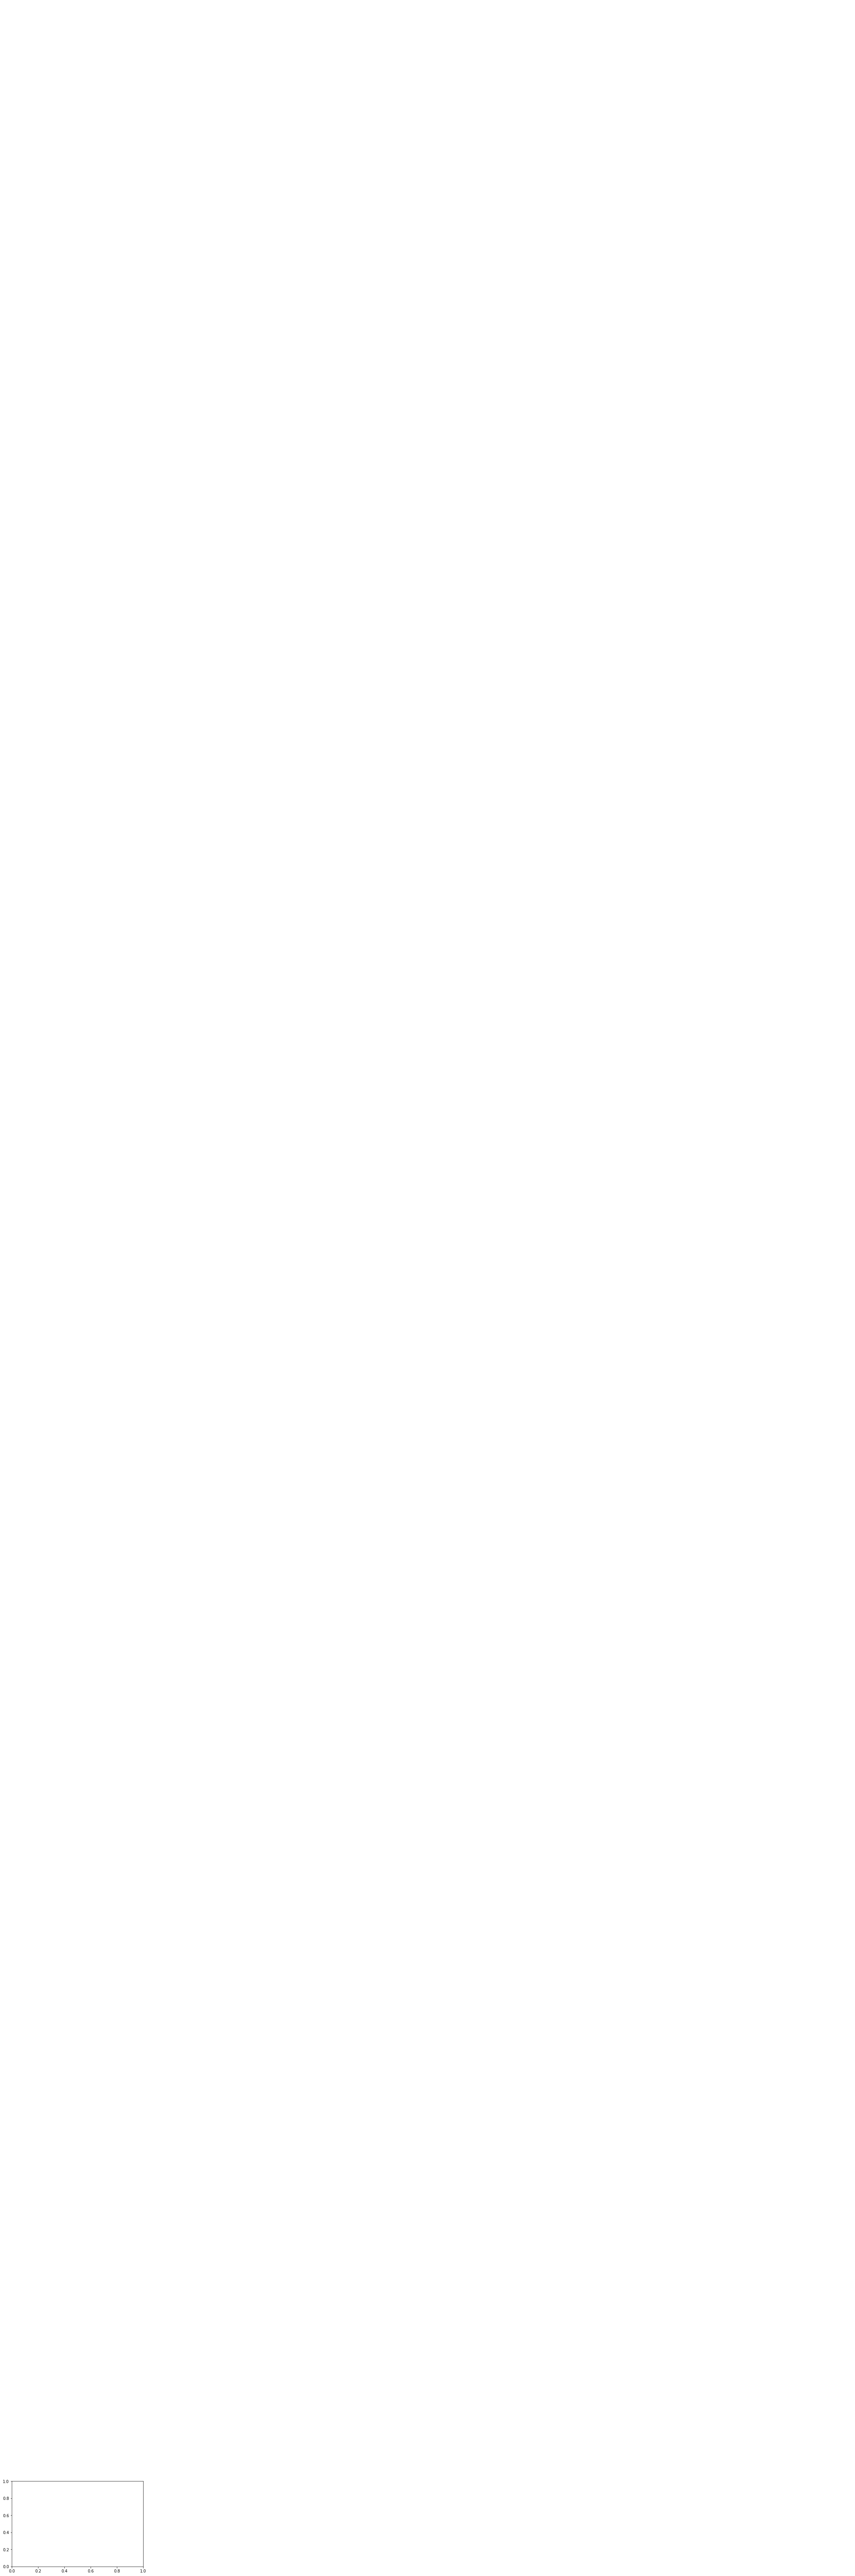

In [199]:
x_values = south['Latitude'] 
y_values = south['Windspeed']
x_label = 'Latitude'
y_label = 'Wind Speed (mph)'
title = 'Wind Speed (mph) vs. Latitude - Northern Hemishpere'

lin_regress(x_values, y_values, x_label, y_label,)